<a href="https://colab.research.google.com/github/asokraju/Control-Systems/blob/master/Boost_Converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Control of boost converter

In this script, we simulate the input shaping controllers proposed in [Differentiation and Passivity for Control of Brayton-Moser Systems](https://arxiv.org/abs/1811.02838)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import seaborn as sns

### Boost Converter Model

The dynamics of the Buck converter are:
\begin{align}
-L\dot{I} &= RI+V(1-u)-V_s\\
C\dot{V} &= I(1-u)-GV
\end{align}

The proposed controller for this system is:
\begin{align}
-k_d \dot{u} &= k_i(u-u_d)+V\dot{I}-\dot{V}I
\end{align}


In [8]:
#@title ##Use slider to change the parameters

#@markdown ---

#@markdown ###System Parameters (Units in milli).
Capacitance = 1 #@param {type:"slider", min:1, max:100, step:0.1}
Inductance = 1 #@param {type:"slider", min:1, max:100, step:0.1}

Resistance = 0 #@param {type:"slider", min:0, max:100, step:0.1}
load = 40 #@param {type:"slider", min:1, max:100, step:0.1}

#@markdown Voltage Source.
Vs = 280 #@param {type:"slider", min:100, max:500, step:10}

#@markdown Desired Voltage.
Vd = 400 #@param {type:"slider", min: 100, max:500, step:10}
if Vd <= Vs:
  print()
#@markdown ---
#@markdown Initial conditions.
current = 22.5 #@param {type:"slider", min:-500, max:500, step:0.1}
voltage = 100 #@param {type:"slider", min:0.0, max:500, step:0.1}
duty_ratio = 0.1 #@param {type:"slider", min:0.01, max:0.99, step:0.01}
#@markdown ---
#@markdown ---
#@markdown Simulation parameters.
Simulation_time = 0.2 #@param {type:"slider", min:0.01, max:10, step:0.01}
perturbation_time = 0.1 #@param {type:"slider", min:0.01, max:10, step:0.01}
load_new = 80 #@param {type:"slider", min:1, max:100, step:0.1}

#@markdown #### At time t = perturbation_time, the load has been changed from 
C = Capacitance*1e-3
L = Inductance*1e-3
R = Resistance*1e-3
G = load*1e-3
G_new = load_new*1e-3

print('The simulation will be conducted for a total of {} milli seconds'.format(Simulation_time))
print('At time t = {} milli seconds, the load will be changed from {} to {}'.format(perturbation_time, G, G_new))



The simulation will be conducted for a total of 0.2 milli seconds
At time t = 0.1 milli seconds, the load will be changed from 0.04 to 0.08


In [0]:
'Simulation'
L, C, G  = 0.001, 0.001, 0.04
kd, ki = 1.6e5, 80e5
Vd, Vs = 400, 280
ud = 1-Vs/Vd
Id = G*Vd/(1-ud)
# function that returns dy/dt
def model(y,t):
  '''Models the closed loop dynamics of the boost-converter'''
  if t>0.3:
    'To verify the robustness we are changing the load at time t = 0.3'
    G = 0.08
  else:
    G = 0.04
  u,i,v=y[0],y[1],y[2]
  didt = -(1/L)*(R*i+(1-u)*v-Vs)
  dvdt = (1/C)*((1-u)*i-G*v)
  dudt = -(1/kd)*(ki*(u-ud)+didt*v-dvdt*i)
  dydt=[dudt, didt,dvdt]
  return dydt
# initial condition
y0 = [.1,22.5,100]

# time points
t = np.linspace(0,.6,20000)

# solve ODE
y = odeint(model,y0,t)

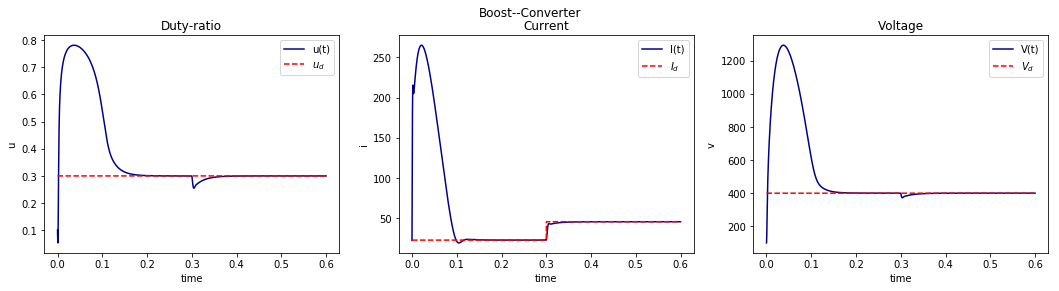

In [11]:
# plot results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
axes[0].plot(t,y[:,0], color = 'darkblue')
axes[0].plot(t,np.full(np.shape(t),ud),linestyle='dashed', color = 'red')
axes[0].legend(['u(t)','$u_d$'])

axes[1].plot(t,y[:,1], color = 'darkblue')
def fun(time):
  '''list comprehension to encorporate the change in the desired values'''
  if time > .3:
      return Vd*0.08/(1-ud)
  else:
      return Vd*0.04/(1-ud)
axes[1].plot(t,[fun(time) for time in t],linestyle='dashed', color = 'red',)
axes[1].legend(['I(t)','$I_d$'])

axes[2].plot(t,y[:,2], color = 'darkblue')
axes[2].plot(t,np.full(np.shape(t),Vd),linestyle='dashed', color = 'red',)
axes[2].legend(['V(t)','$V_d$'])

axes[0].set_title("Duty-ratio")
axes[1].set_title("Current")
axes[2].set_title("Voltage")

axes[0].set_xlabel("time")
axes[1].set_xlabel("time")
axes[2].set_xlabel("time")

axes[0].set_ylabel("u")
axes[1].set_ylabel("i")
axes[2].set_ylabel("v")

# Setting the ylabel to '% change'
# ... YOUR CODE FOR TASK 7 ...
#axes[0].set_ylabel('# change')
#axes[1].set_ylabel('% change')
plt.suptitle('Boost--Converter')
plt.show()